<a href="https://colab.research.google.com/github/bharathmrr/Capture-/blob/main/ridgeand_lasso.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import numpy as np

In [14]:
data=pd.read_csv('/content/sample_data/california_housing_train.csv')

In [15]:
x=data['total_rooms']
y=data['median_house_value']


In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train.values.reshape(-1,1))
x_test=sc.fit_transform(x_test.values.reshape(-1,1))


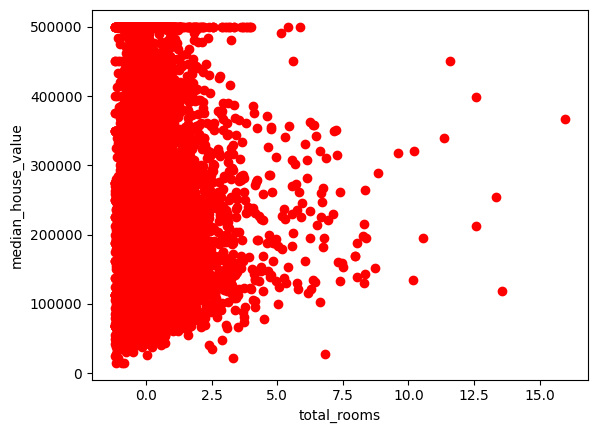

In [42]:
import matplotlib.pyplot as plt
plt.scatter(x_train,y_train,color='red')
plt.xlabel('total_rooms')
plt.ylabel('median_house_value')
plt.show()

In [18]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [19]:
from sklearn.metrics import mean_squared_error,r2_score
y_pred=lr.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [20]:
from sklearn.linear_model import Ridge
ridge=Ridge()


In [22]:
paramters={'alpha':[0.001,0.01,0.1,1,10,100,1000]}

In [23]:
from sklearn.model_selection import GridSearchCV
ridge_regressor=GridSearchCV(ridge,paramters,scoring='neg_mean_squared_error',cv=5)

In [26]:
ridge_regressor.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]},
             scoring='neg_mean_squared_error')

In [27]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-13381218700.152227


In [32]:
from sklearn.metrics import mean_squared_error, r2_score # Make sure r2_score is imported

y_pred = ridge_regressor.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)  # Call r2_score as a function
print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 12598929890.44887
R-squared: 0.021715567323942198


<ipython-input-34-4367c2c057a4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


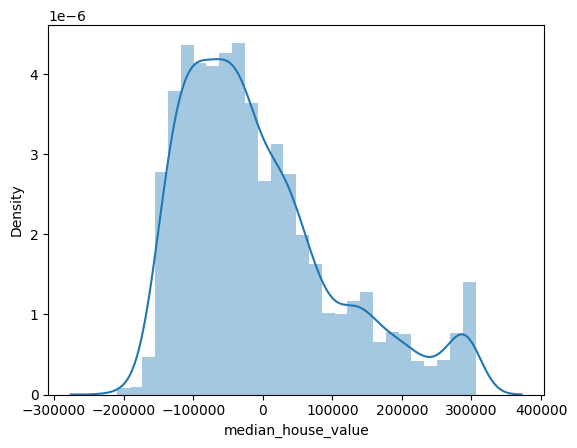

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(y_test-y_pred)
plt.show()

In [35]:
from sklearn.linear_model import Lasso
lasso=Lasso()

In [37]:
from sklearn.model_selection import GridSearchCV
paramters={'alpha':[0.001,0.01,0.1,1,10,100,1000]}
lasso_regressor=GridSearchCV(lasso,paramters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(x_train,y_train)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 10}
-13381231641.831423


In [39]:
y_pred=lasso_regressor.predict(x_test)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [40]:
r2

0.02176469270954684

<ipython-input-41-75adb1dd5983>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred)


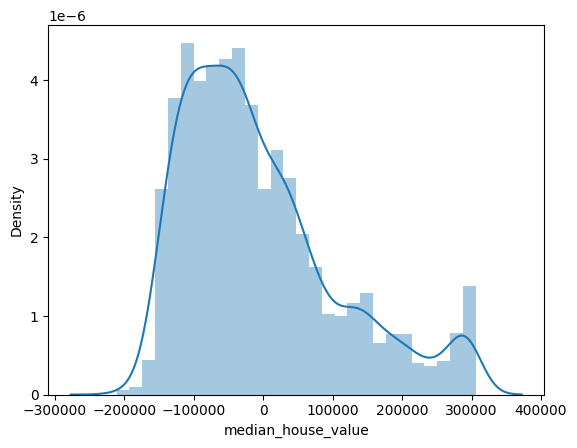

In [41]:
sns.distplot(y_test-y_pred)
plt.show()